First make sure to walk through linearizing maze. Show example of BAD isomap mapping and how to fix with decreasing or increasing the step size.

First import the module(s) and create a new analysis object.

In [1]:
# from callfunc import processData
import sys
from pathlib import Path
#print('sys.path: {}'.format(sys.path))
try:
    from neuropy import core
except ImportError:
    sys.path.append(r'C:\Users\Pho\repos\NeuroPy')
    # sys.path.append(r'/Users/pho/repo/Python Projects/NeuroPy')
    print('neuropy module not found, adding directory to sys.path. \nUpdated sys.path: {}'.format(sys.path))
    from neuropy import core

# import importlib
# importlib.reload(core)

from neuropy.io import NeuroscopeIO, BinarysignalIO
from neuropy.core import Shank, Probe, ProbeGroup
from neuropy.plotting import plot_probe

from ProcessData import processData, ProcessData

neuropy module not found, adding directory to sys.path. 
Updated sys.path: ['C:\\Users\\Pho\\repos\\NeuroPy\\examples', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\python39.zip', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\DLLs', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\lib', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy', '', 'C:\\Users\\Pho\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\lib\\site-packages', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\lib\\site-packages\\win32', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Pho\\anaconda3\\envs\\NeuroPy\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Pho\\.ipython', 'C:\\Users\\Pho\\repos\\NeuroPy']


In [2]:
# from ProcessData import processData
# the following two lines make interactive plots work in this notebook - not necessary if running from an IDE like
# PyCharm or VS Code
# import matplotlib
# matplotlib.use('TkAgg')

# Now initiate the class
# basedir = '/data/Working/Opto/Jackie671/Jackie_placestim_day2/Jackie_TRACK_2020-10-07_11-21-39'  # fill in here
basedir = 'R:\data\Bapun\Day5TwoNovel'
# basedir = '/Volumes/iNeo/Data/Bapun/Day5TwoNovel'
sess = processData(basedir)
print(sess.recinfo)

Issue with pickled POSIX_PATH on windows for path R:\data\Bapun\Day5TwoNovel\RatS-Day5TwoNovel-2020-12-04_07-55-09.probegroup.npy, falling back to non-pickled version...
linearized position loaded from file.
Loading success: .ripple.npy.
Loading success: .mua.npy.
Loading success: .pbe.npy.
filename: R:\data\Bapun\Day5TwoNovel\RatS-Day5TwoNovel-2020-12-04_07-55-09.xml 
# channels: 195
sampling rate: 30000
lfp Srate (downsampled): 1250


In [ ]:
sess.ripple.to_dataframe()
sess.pbe.to_dataframe()

In [ ]:
# print("sess.epochs: {}\n".format(str(sess.epochs)))
sess.epochs.to_dataframe()

In [ ]:
sess.neurons.get_all_spikes()

In [ ]:
sess.position.sampling_rate

In [ ]:
plot_probe(sess.probegroup)

In [ ]:
sess.position.z

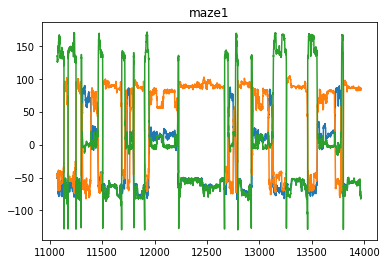

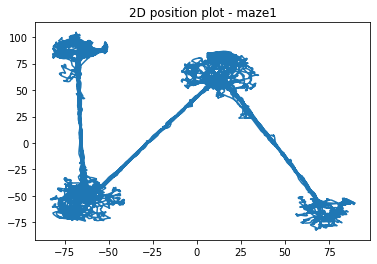

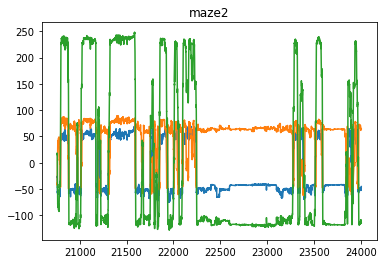

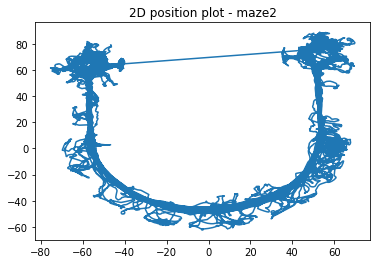

In [17]:
## Plot Computed Linearized Positions:
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt

def plot_linearized_positions(time, maze_pos, linear_pos):
    plt.plot(time, maze_pos.x)
    plt.plot(time, maze_pos.y)
    plt.plot(time, linear_pos)
    # plt.plot(linear_pos.time, linear_pos.x)
    
# active_positions = sess.position # all

def plot_epoch_positions(session, active_epoch_label_name='maze1'):
    active_epoch_times = session.epochs[active_epoch_label_name] # array([11070, 13970], dtype=int64)
    acitve_epoch_timeslice_indicies = session.position.time_slice_indicies(active_epoch_times[0], active_epoch_times[1])
    active_epoch_pos = session.position.time_slice(active_epoch_times[0], active_epoch_times[1])

    # active_positions = sess.position # all
    active_positions = active_epoch_pos # only this epoch
    active_times = active_positions.time
    active_linear_pos = active_positions.linear_pos

    plot_linearized_positions(active_times, active_positions, active_linear_pos)
    plt.title(active_epoch_label_name)
    plt.show()

    plt.plot(active_positions.x, active_positions.y)
    plt.title('2D position plot - {}'.format(active_epoch_label_name))
    plt.show()
    
active_epoch_label_name = 'maze1'
plot_epoch_positions(sess, active_epoch_label_name)

active_epoch_label_name = 'maze2'
plot_epoch_positions(sess, active_epoch_label_name)

# plt.plot(active_positions.x, active_positions.y)
# plt.title('2D position plot - all mazes superimposed')
# plt.show()

# plot_linearized_positions(active_positions_maze1, linearized_positions_maze1)
# plt.title('maze1')
# plt.show()

# plot_linearized_positions(active_positions_maze2, linearized_positions_maze2)
# plt.title('maze2')
# plt.show()

In [ ]:
signal = sess.eegfile.get_signal(channel_id=[1, 2, 3, 4], t_start=1, t_stop=1.2)
plotting.plot_signal_traces(signal)

In [ ]:
# Plot Mua. Note that mua has been set on the session object:
from neuropy import plotting
smth_mua = sess.mua.get_smoothed(sigma=0.02)
plotting.plot_mua(smth_mua)

In [ ]:
sess.pbe.to_dataframe()

## Session Plotting

In [ ]:
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from neuropy.plotting import plot_raster

plot_raster(sess.neurons, color='jet', add_vert_jitter=True)
plt.show()

In [13]:
sess.tracks.create(epoch_names=['maze1','maze2'])
sess.tracks.plot()

AttributeError: 'ProcessData' object has no attribute 'tracks'

### Calculate ratemaps
Assuming you have already set `track` epochs using `sess.tracks.create()`, we can caclulate ratemaps for track running. Here we are caclulating ratemaps for `maze1` where the animal was running on a circular track.

In [ ]:
sess.placefield.pf1d.compute('maze1',run_dir='forward')

In [ ]:
sess.neurons.keys()

Run the code below - you will generate an interactive window that looks like the below to choose the start and end of maze running.
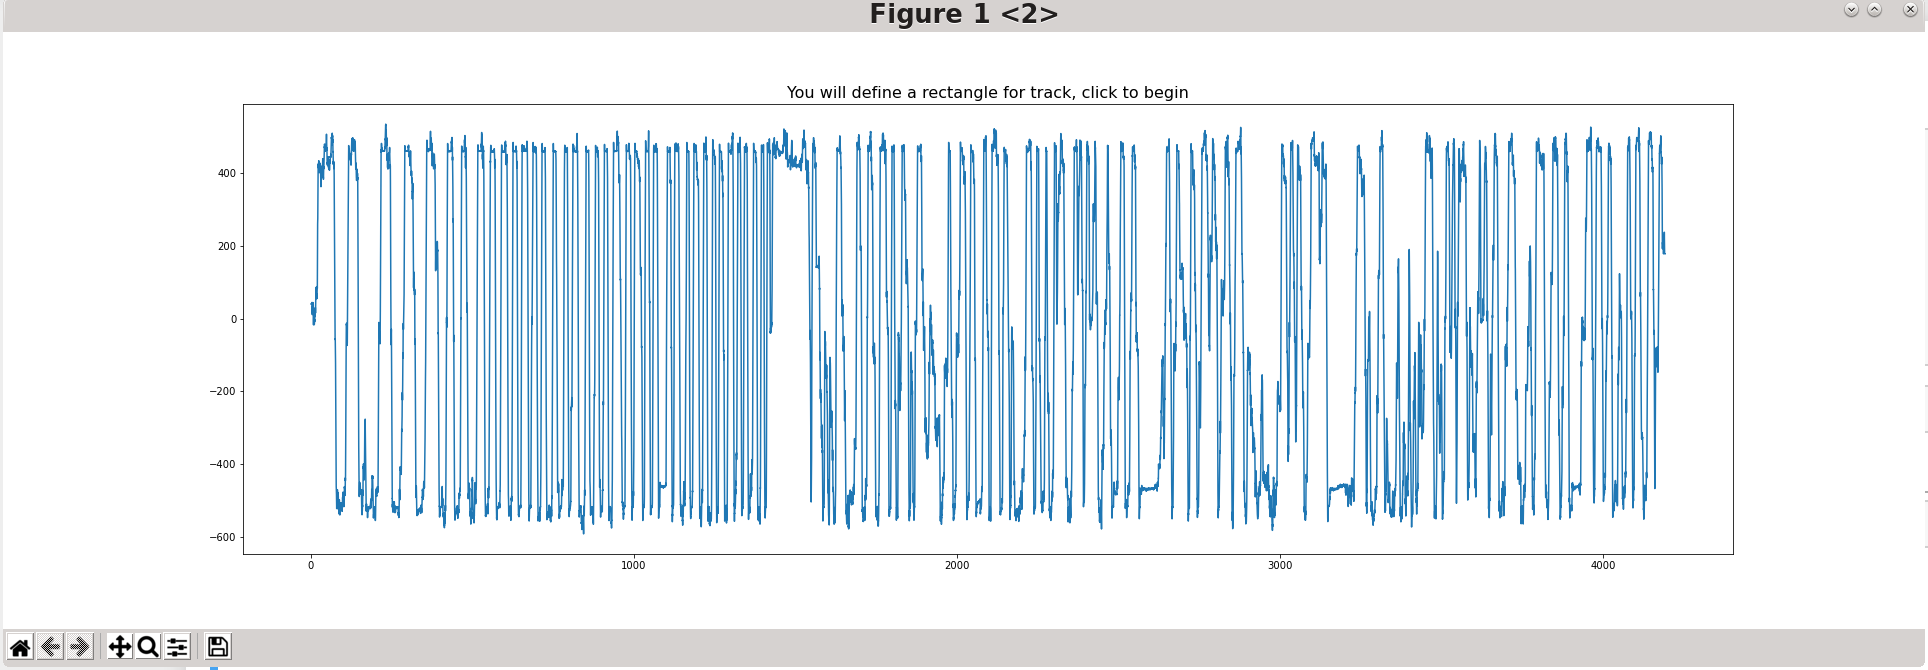

In [ ]:
sess.epochs.getfromPosition()

In [ ]:
sess.epochs

Next run???